In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:
df = pd.read_csv("My_Data.csv")

In [4]:
df.rename(columns ={'Job titiles' : 'Job Titles'}, inplace = True  )
df

,Job Titles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare
...,...,...,...,...,...,...
4701,Singer,5%,686,2798,0.245175,Data & IT
4702,Airport,5%,556,2206,0.252040,Administrative & Clerical
4703,Director,5%,1316,4695,0.280298,Leadership & Strategy
4704,Nurse,5%,710,2594,0.273709,Medical & Healthcare


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job titiles        4706 non-null   object 
 1   AI Impact          4706 non-null   object 
 2   Tasks              4706 non-null   int64  
 3   AI models          4706 non-null   int64  
 4   AI_Workload_Ratio  4706 non-null   float64
 5   Domain             4706 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 220.7+ KB


In [69]:
df.describe()

,AI Impact,AI_Workload_Ratio
count,4699.000000,4699.000000
mean,30.327942,0.204620
std,18.212978,0.076547
min,5.000000,0.036600
25%,15.000000,0.137300
50%,25.000000,0.198900
75%,40.000000,0.260450
max,98.000000,1.000000


In [6]:
df.isnull()

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
4701,False,False,False,False,False,False
4702,False,False,False,False,False,False
4703,False,False,False,False,False,False
4704,False,False,False,False,False,False


In [5]:
 df = df[~df["AI_Workload_Ratio"].isnull() & ~df["AI_Workload_Ratio"].isin([np.inf, -np.inf])]

In [7]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Job Titles - 0%
AI Impact - 0%
Tasks - 0%
AI models - 0%
AI_Workload_Ratio - 0%
Domain - 0%


In [6]:
df.drop_duplicates()

,Job Titles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare
...,...,...,...,...,...,...
4701,Singer,5%,686,2798,0.245175,Data & IT
4702,Airport,5%,556,2206,0.252040,Administrative & Clerical
4703,Director,5%,1316,4695,0.280298,Leadership & Strategy
4704,Nurse,5%,710,2594,0.273709,Medical & Healthcare


In [7]:
df["AI Impact"] = df["AI Impact"].str.replace("%", "")
df

C:\Users\DELL\AppData\Local\Temp\ipykernel_5664\3354747224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["AI Impact"] = df["AI Impact"].str.replace("%", "")


,Job Titles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98,365,2546,0.143362,Communication & PR
1,Data Collector,95,299,2148,0.139199,Data & IT
2,Data Entry,95,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92,194,1369,0.141709,Medical & Healthcare
...,...,...,...,...,...,...
4701,Singer,5,686,2798,0.245175,Data & IT
4702,Airport,5,556,2206,0.252040,Administrative & Clerical
4703,Director,5,1316,4695,0.280298,Leadership & Strategy
4704,Nurse,5,710,2594,0.273709,Medical & Healthcare


In [8]:
df.sort_values (by = ['AI Impact'], inplace = False, ascending = False )

,Job Titles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98,365,2546,0.143362,Communication & PR
2,Data Entry,95,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95,193,1366,0.141288,Leadership & Strategy
1,Data Collector,95,299,2148,0.139199,Data & IT
4,Compliance Officer,92,194,1369,0.141709,Medical & Healthcare
...,...,...,...,...,...,...
4201,Hospitalist,10,434,1789,0.242594,Data & IT
4202,Immunologist,10,455,1815,0.250689,Administrative & Clerical
4203,Medical Doctor,10,472,1673,0.282128,Leadership & Strategy
4204,Mental Health Clinician,10,614,2293,0.267771,Medical & Healthcare


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4699 entries, 0 to 4705
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Titles         4699 non-null   object 
 1   AI Impact          4699 non-null   float64
 2   Tasks              4699 non-null   float64
 3   AI models          4699 non-null   float64
 4   AI_Workload_Ratio  4699 non-null   float64
 5   Domain             4699 non-null   int64  
 6   domain             4699 non-null   int32  
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 275.3+ KB


In [9]:
df['AI_Workload_Ratio'] = df['AI_Workload_Ratio'].round(4)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5664\3699580134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AI_Workload_Ratio'] = df['AI_Workload_Ratio'].round(4)


In [10]:
df = df.astype({
    "Tasks": "float",
    "AI models": "float"  ,
    "AI_Workload_Ratio": "float",
    "AI Impact": "float"
})

In [96]:
features = df[["Tasks", "AI models", "AI_Workload_Ratio"]]
target = df["AI Impact"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=150)


In [99]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest model
model = RandomForestRegressor()

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = model.predict(X_test)

# Print the results
print("R-squared score:", model.score(X_test, y_test))

R-squared score: 0.39412483282330624


In [36]:
new_data_point = {"Tasks": 305, "AI models": 170 , "AI_Workload_Ratio": 0.42}
new_data_frame = pd.DataFrame([new_data_point])
predicted_impact = model.predict(new_data_frame)[0]
print("Predicted AI Impact:", predicted_impact)


Predicted AI Impact: 38.16


In [37]:
df['AI Impact'] = df['AI Impact'].astype(float)
df['AI_Workload_Ratio'] = df['AI_Workload_Ratio'].astype(float)

correlation = df['AI Impact'].corr(df['AI_Workload_Ratio'])

print("Correlation between AI Impact and AI_Workload_Ratio:", correlation)

Correlation between AI Impact and AI_Workload_Ratio: -0.2878786202799393


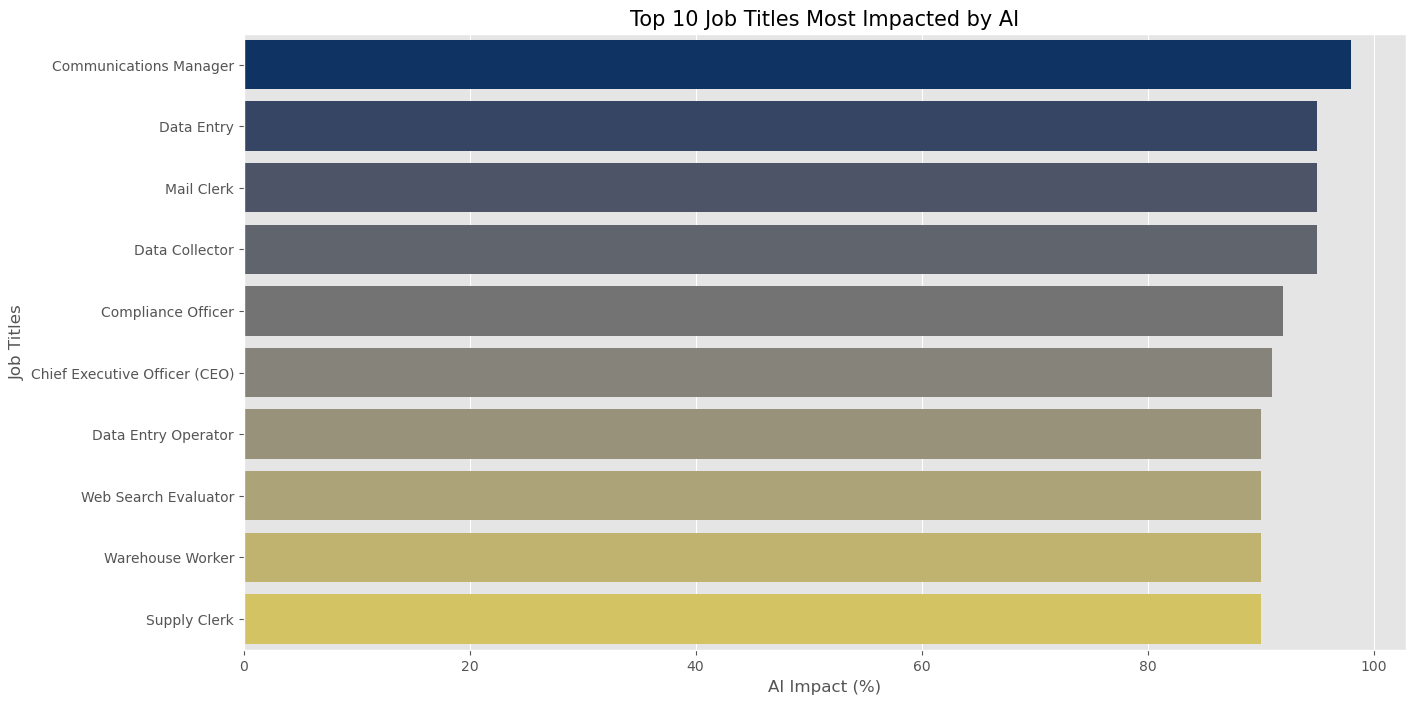

In [11]:
top_10_impacted_jobs = df.sort_values(by='AI Impact', ascending=False).head(10)

# Plotting the top 10 impacted jobs
plt.figure(figsize=(15, 8))
sns.barplot(x='AI Impact', y='Job Titles', data=top_10_impacted_jobs, palette='cividis')
plt.title('Top 10 Job Titles Most Impacted by AI', fontsize=15)
plt.xlabel('AI Impact (%)', fontsize=12)
plt.ylabel('Job Titles', fontsize=12)
plt.show()

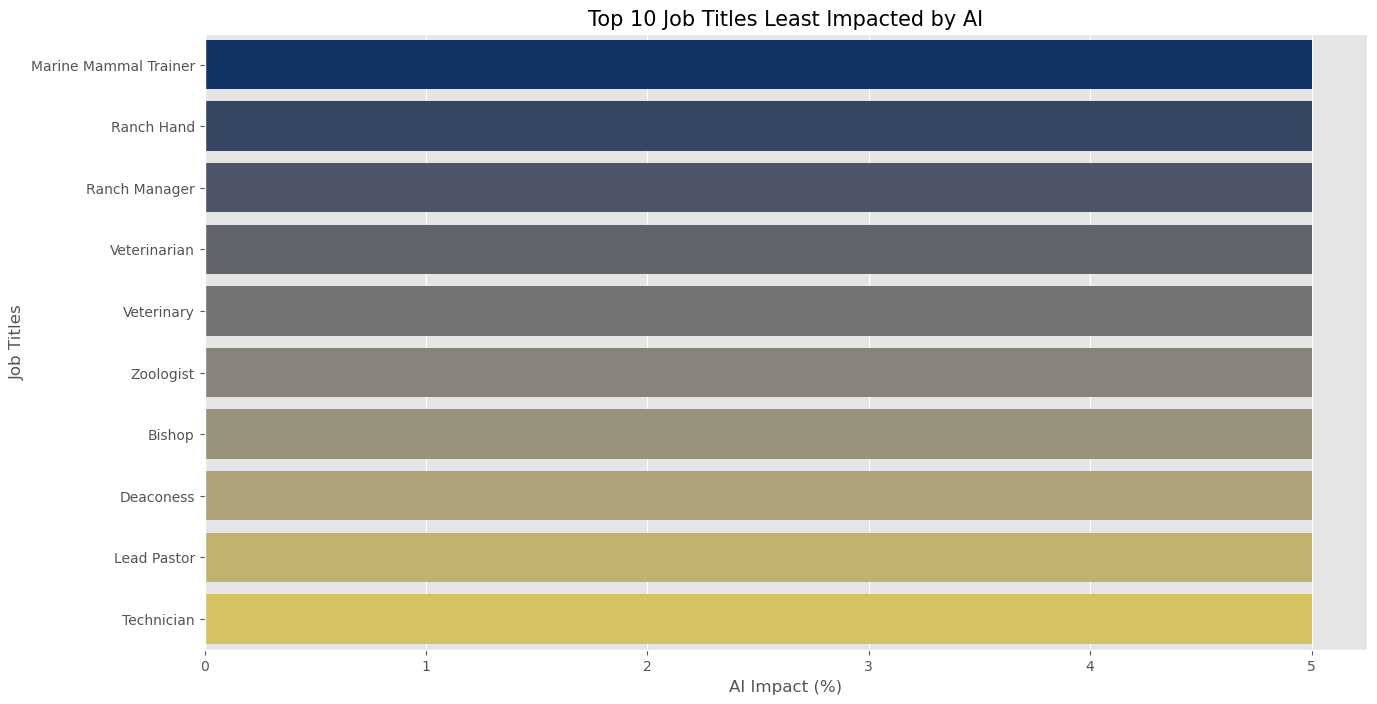

In [12]:
bottom_10_impacted_jobs = df.sort_values(by='AI Impact', ascending=False).tail(10)

# Plotting the top 10 least impacted jobs
plt.figure(figsize=(15, 8))
sns.barplot(x='AI Impact', y='Job Titles', data=bottom_10_impacted_jobs, palette='cividis')
plt.title('Top 10 Job Titles Least Impacted by AI', fontsize=15)
plt.xlabel('AI Impact (%)', fontsize=12)
plt.ylabel('Job Titles', fontsize=12)
plt.show()

<Axes: xlabel='AI Impact', ylabel='Domain'>

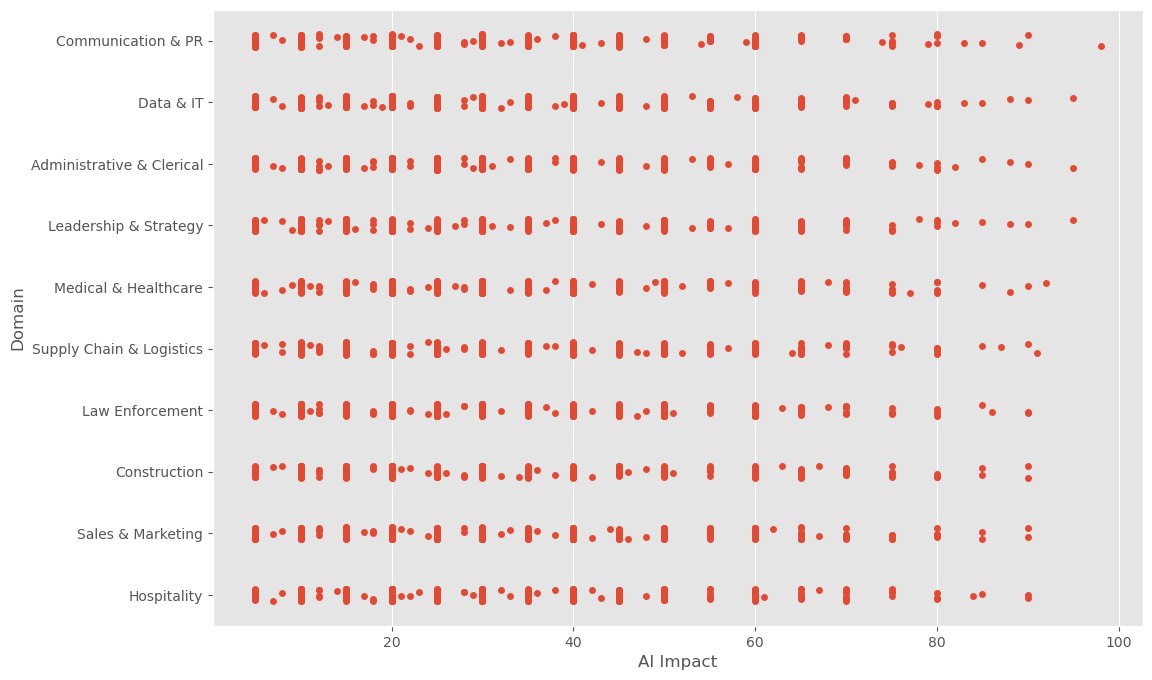

In [13]:
sns.stripplot(x="AI Impact", y="Domain", data=df)


In [14]:
df2 = df[["AI Impact", "Tasks", "AI models", "AI_Workload_Ratio"]]
df2.corr(method='pearson')

,AI Impact,Tasks,AI models,AI_Workload_Ratio
AI Impact,1.000000,-0.421453,-0.415553,-0.287879
Tasks,-0.421453,1.000000,0.928229,0.631304
AI models,-0.415553,0.928229,1.000000,0.346894
AI_Workload_Ratio,-0.287879,0.631304,0.346894,1.000000


In [15]:
correlation_mat = df2.apply(lambda x: x.factorize()[0]).corr()

#We use unstack to ive a wide format
corr_pairs = correlation_mat.unstack()

# we sort our values using the "quicksort" method, which is great for large datasets

sorted_pairs = corr_pairs.sort_values(kind="quicksort")

strong_correlation = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_correlation)

Tasks              AI_Workload_Ratio    0.501710
AI_Workload_Ratio  Tasks                0.501710
AI Impact          Tasks                0.516082
Tasks              AI Impact            0.516082
AI models          AI_Workload_Ratio    0.543241
AI_Workload_Ratio  AI models            0.543241
Tasks              AI models            0.557727
AI models          Tasks                0.557727
AI Impact          AI_Workload_Ratio    0.659387
AI_Workload_Ratio  AI Impact            0.659387
AI Impact          AI models            0.677761
AI models          AI Impact            0.677761
AI Impact          AI Impact            1.000000
Tasks              Tasks                1.000000
AI models          AI models            1.000000
AI_Workload_Ratio  AI_Workload_Ratio    1.000000
dtype: float64


<Axes: xlabel='Tasks', ylabel='AI models'>

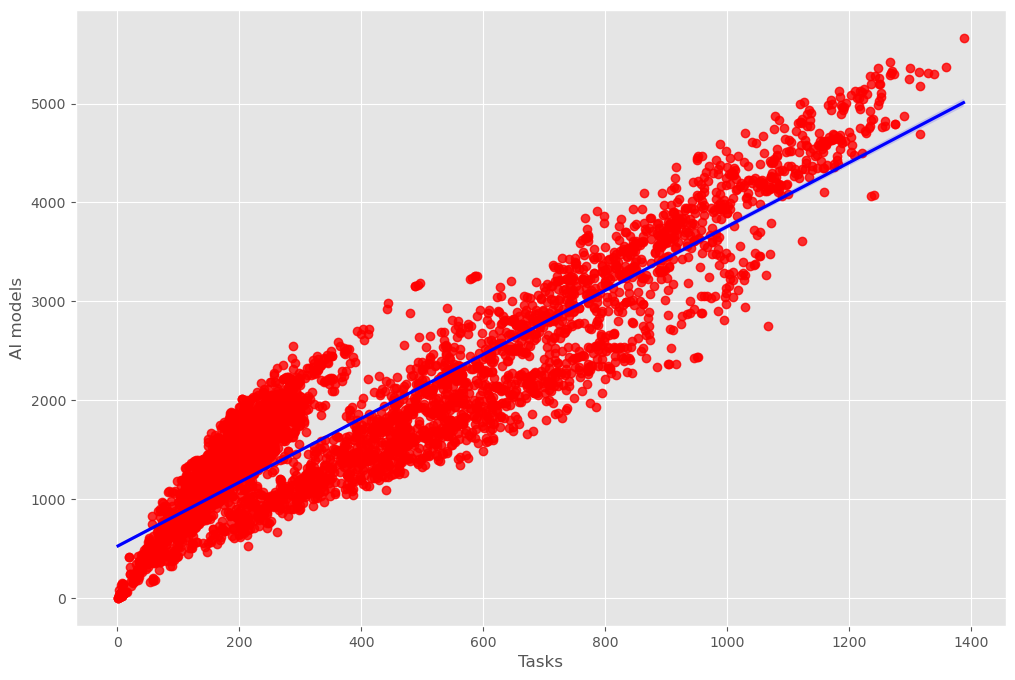

In [16]:
sns.regplot (x= 'Tasks' , y= 'AI models' , data = df,scatter_kws = {"color":"red"}, line_kws = {"color":"Blue"})


<Axes: xlabel='Tasks', ylabel='AI_Workload_Ratio'>

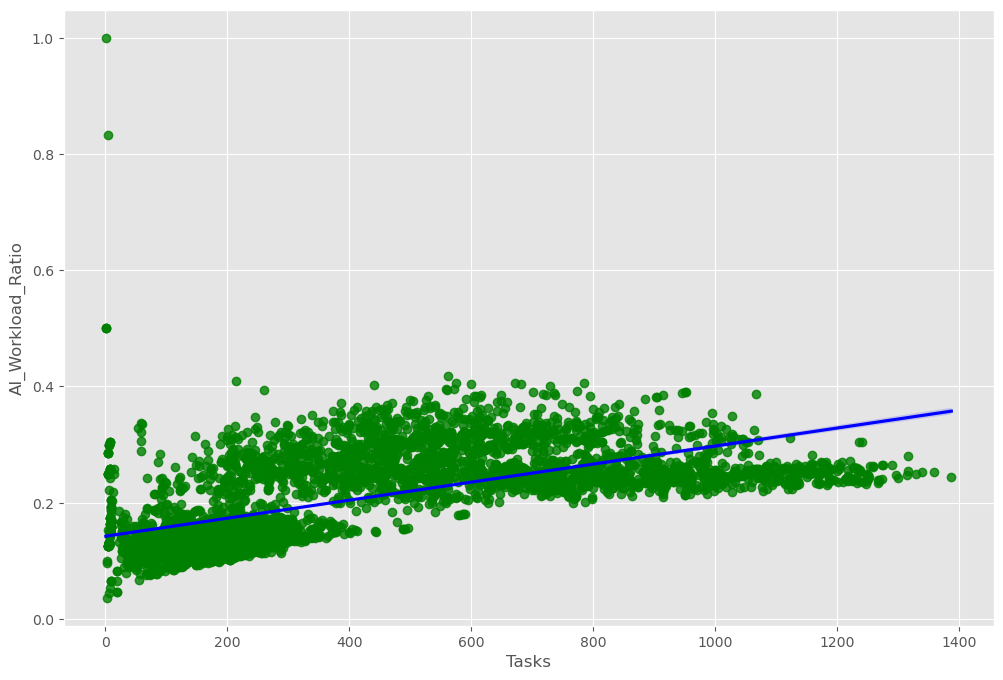

In [17]:
sns.regplot (x= 'Tasks', y= 'AI_Workload_Ratio', data = df,scatter_kws = {"color":"green"}, line_kws = {"color":"blue"})


<Axes: xlabel='AI models', ylabel='AI_Workload_Ratio'>

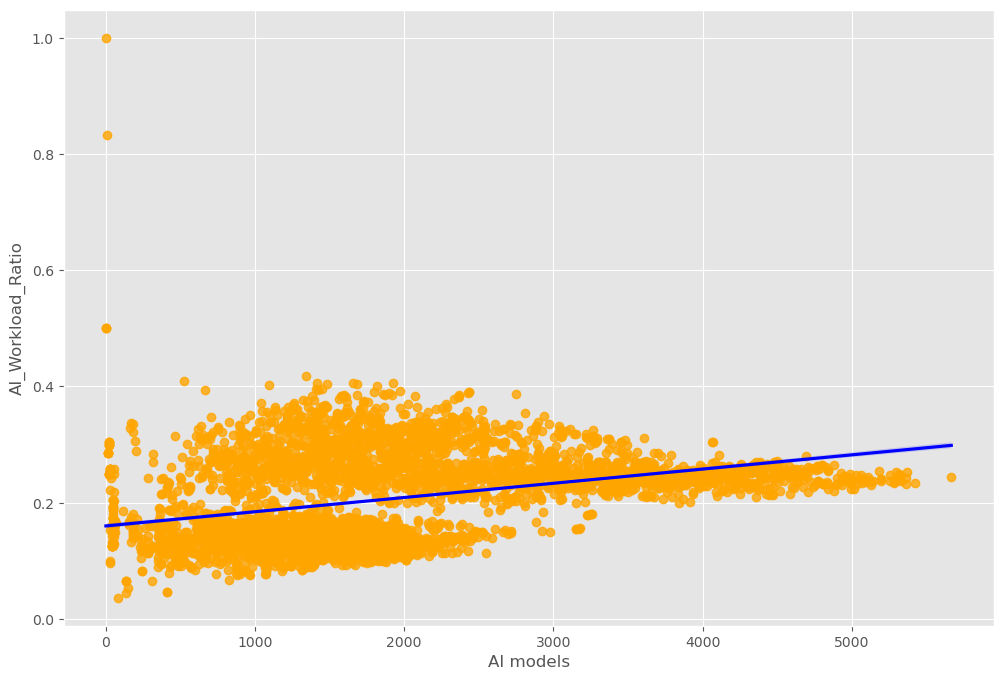

In [18]:
sns.regplot (x= 'AI models', y= 'AI_Workload_Ratio', data = df,scatter_kws = {"color":"orange"}, line_kws = {"color":"blue"})


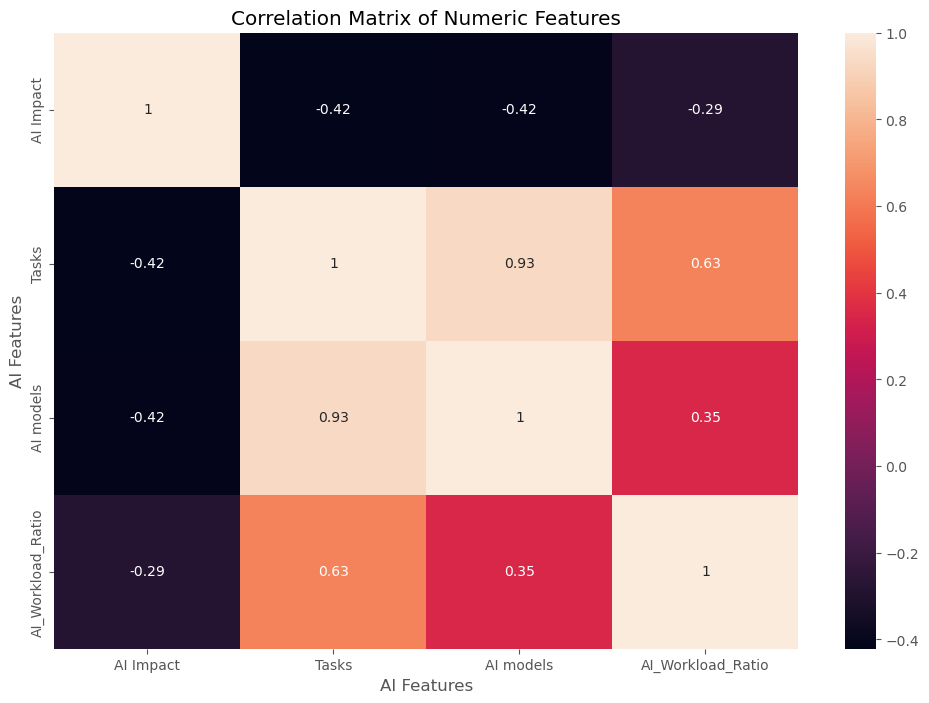

In [19]:
correlation_matrix = df2.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix of Numeric Features')
plt.xlabel('AI Features')
plt.ylabel('AI Features')
plt.show()

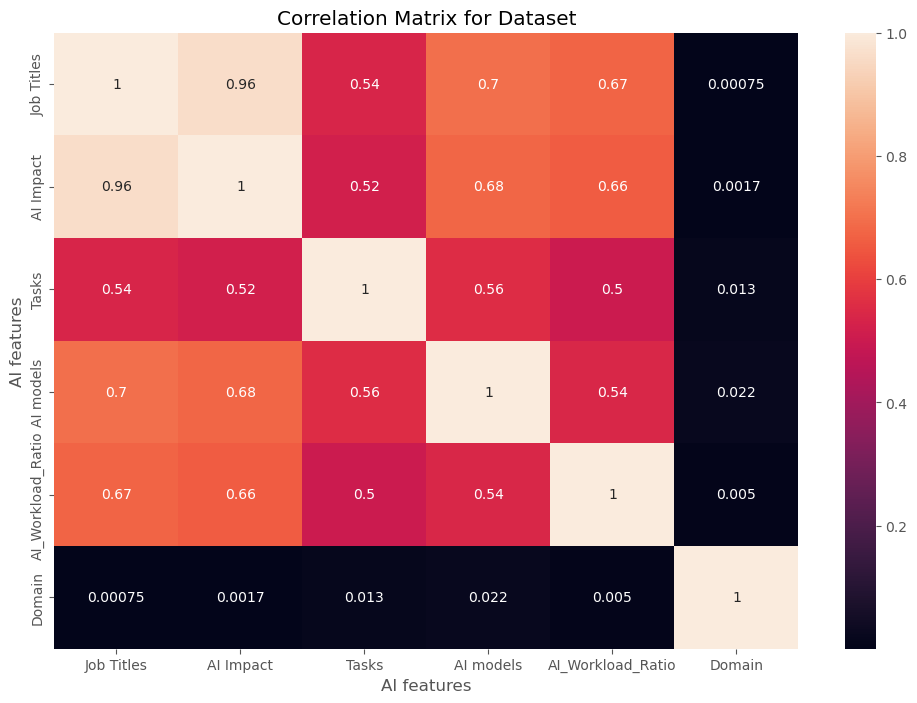

In [20]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Matrix for Dataset")
plt.xlabel("AI features")
plt.ylabel("AI features")
plt.show()

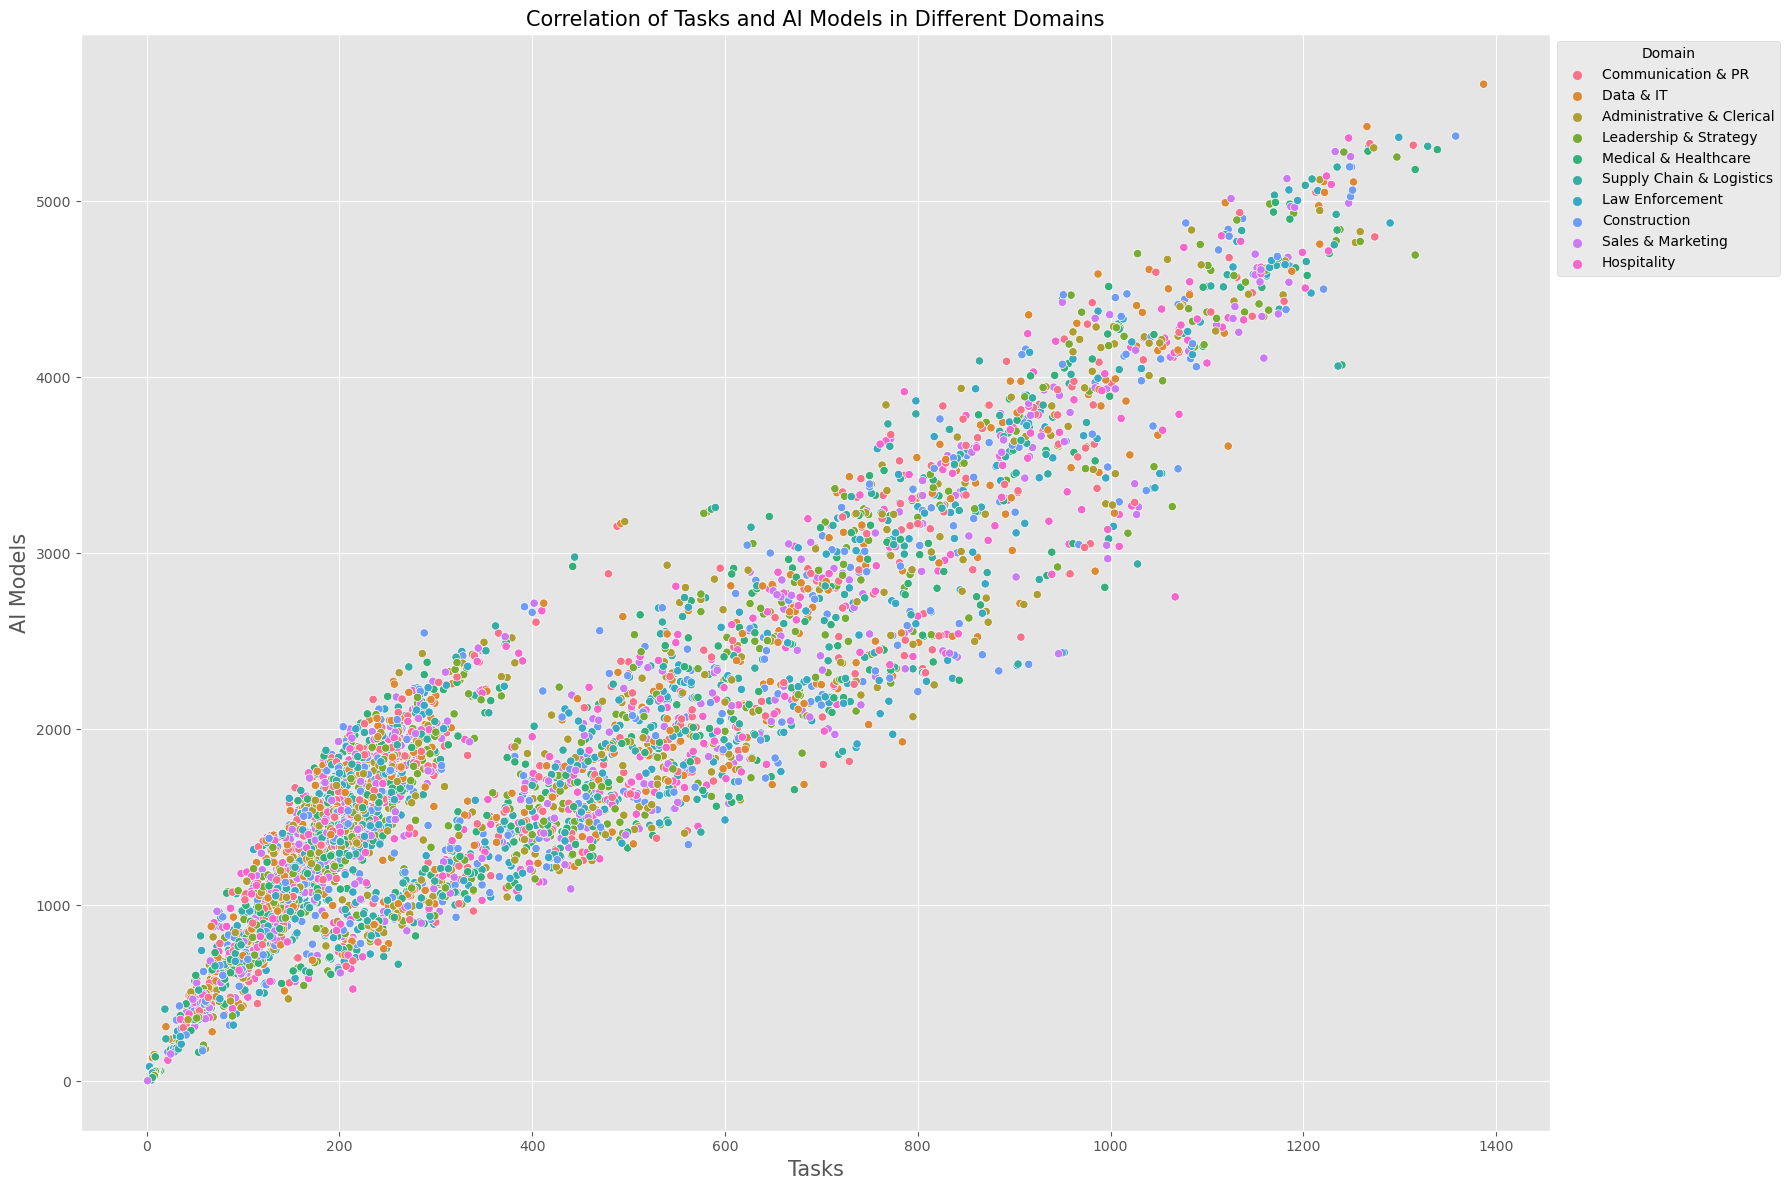

In [21]:
plt.figure(figsize=(18, 12))
sns.scatterplot(data=df, x='Tasks', y='AI models', hue='Domain')
plt.title('Correlation of Tasks and AI Models in Different Domains', fontsize=15)
plt.xlabel('Tasks', fontsize=15)
plt.ylabel('AI Models', fontsize=15)
plt.legend(title='Domain', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [94]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R-squared score:", model.score(X_test, y_test))

R-squared score: 0.3944662850631011


In [95]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R-squared score:", model.score(X_test, y_test))

R-squared score: 0.004802320804206062


In [22]:
features4 = df[[ "AI models", "Tasks"]]
target4 = df["AI Impact"]
X_train, X_test, y_train, y_test = train_test_split(features4, target4, test_size=0.10, random_state=150)


In [23]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R-squared score:", model.score(X_test, y_test))

R-squared score: 0.3584416853352862


In [24]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R-squared score:", model.score(X_test, y_test))

R-squared score: 0.32637461947108914


In [190]:

from sklearn.svm import SVR

model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R-squared score:", model.score(X_test, y_test))

R-squared score: 0.12988572588567338


In [45]:
features4 = df[[ "AI_Workload_Ratio", "Tasks"]]
target4 = df["AI Impact"]
X_train, X_test, y_train, y_test = train_test_split(features4, target4, test_size=0.05, random_state=150)


In [43]:
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R-squared score:", model.score(X_test, y_test))

R-squared score: 0.12835054892818598


In [46]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R-squared score:", model.score(X_test, y_test))

R-squared score: 0.37540593860161453


In [47]:
model = LinearRegression()
model.fit(X_train, y_train)
print("R-squared score:", model.score(X_test, y_test))

R-squared score: 0.17329380345060763


In [61]:
features5 = df[[ "AI models","Tasks"]]
target5 = df["AI Impact"]
X_train, X_test, y_train, y_test = train_test_split(features5, target5, test_size=0.20, random_state=150)


In [62]:
model = LinearRegression()
model.fit(X_train, y_train)
print("R-squared score:", model.score(X_test, y_test))

R-squared score: 0.15693241025463367


In [63]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R-squared score:", model.score(X_test, y_test))

R-squared score: 0.38770181004003246


In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Domain"] = le.fit_transform(df["Domain"])

In [74]:
features6 = df[[ "AI models","Domain","Tasks"]]
target6 = df["AI Impact"]
X_train, X_test, y_train, y_test = train_test_split(features6, target6, test_size=0.25, random_state=150)


In [75]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R-squared score:", model.score(X_test, y_test))

R-squared score: 0.3938436746814552


In [73]:
model = LinearRegression()
model.fit(X_train, y_train)
print("R-squared score:", model.score(X_test, y_test))

R-squared score: 0.15426309238185743


In [34]:
features7 = df[[ "AI models","Tasks","AI_Workload_Ratio"]]
target7 = df["AI Impact"]
X_train, X_test, y_train, y_test = train_test_split(features7, target7, test_size=0.05, random_state=20)


In [35]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R-squared score:", model.score(X_test, y_test))

R-squared score: 0.3873046438581177


In [110]:
new_data_point = {"AI models": 170 ,"Tasks": 305,  "AI_Workload_Ratio": 0.42}
new_data_frame = pd.DataFrame([new_data_point])
predicted_impact = model.predict(new_data_frame)
print(predicted_impact)

[39.48357143]


In [36]:
df['Predicted_AI_Impact'] = model.predict(df[['AI models','Tasks',  'AI_Workload_Ratio' ]])


In [112]:
df

,Job Titles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain,domain,Predicted_AI_Impact
0,Communications Manager,98.0,365.0,2546.0,0.1434,1,1,66.63
1,Data Collector,95.0,299.0,2148.0,0.1392,3,3,67.86
2,Data Entry,95.0,325.0,2278.0,0.1427,0,0,84.55
3,Mail Clerk,95.0,193.0,1366.0,0.1413,6,6,74.83
4,Compliance Officer,92.0,194.0,1369.0,0.1417,7,7,80.96
...,...,...,...,...,...,...,...,...
4701,Singer,5.0,686.0,2798.0,0.2452,3,3,7.55
4702,Airport,5.0,556.0,2206.0,0.2520,0,0,10.87
4703,Director,5.0,1316.0,4695.0,0.2803,6,6,29.80
4704,Nurse,5.0,710.0,2594.0,0.2737,7,7,18.20


In [45]:
df2 = pd.read_csv("Occupations SAP - Sheet1.csv")
df2.columns=['JOB TITLE',  'Tasks',  'AI models',  'AI_Workload_Ratio',  'AI Impact']
# df2

In [47]:
df2['AI Impact'] = model.predict(df2[['AI models','Tasks','AI_Workload_Ratio']])
df2

,JOB TITLE,Tasks,AI models,AI_Workload_Ratio,AI Impact
0,Accountant,117,966,0.121118,49.500000
1,Financial Analyst,168,1242,0.135266,55.190000
2,Manager,288,2547,0.113074,40.200000
3,Banker,994,4020,0.247264,11.700000
4,Physician,540,2130,0.253521,13.140000
5,Pharmacist,133,1367,0.097293,26.600000
6,Therapist,114,983,0.115972,78.175000
7,Medical Assistant,703,2617,0.268628,18.610000
8,Software Developer,162,1081,0.149861,72.150000
9,Computer Programmer,160,1022,0.156556,65.200000
